In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reg_data=pd.read_csv('/home/jupyter-d.fomicheva-1/Untitled Folder/problem1-reg_data.csv', sep=';')

In [3]:
auth_data=pd.read_csv('/home/jupyter-d.fomicheva-1/Untitled Folder/problem1-auth_data.csv', sep=';')

In [4]:
# ts to datetime format
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s')
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s')

In [5]:
# joining datasets together
df = pd.merge(reg_data, auth_data, on='uid', how='left')

In [50]:
#taking a sample - not necessary
df_sample = df.sample(n=1000)

In [51]:
#calculating number of days users stay
df_sample['seniority'] = (df_sample['auth_ts'] - df_sample['reg_ts']).dt.days + 1

In [52]:
# grouping sign in time and seniority
group = df_sample.groupby(['reg_ts', 'seniority'])

In [53]:
# making cohorts
cohort_data = group['uid'].size()
cohort_data = cohort_data.reset_index()

In [56]:
# create pivot to visualize it later
cohort_counts = cohort_data.pivot(index='reg_ts', columns='seniority', values='uid')

In [57]:
# We need the base for our retention rate calculation, so take the first column of cohort_counts
base = cohort_counts[1]

In [58]:
# And now we apply the divide method to our cohort_counts, dividing it by the base
retention = cohort_counts.divide(base, axis=0).round(3)

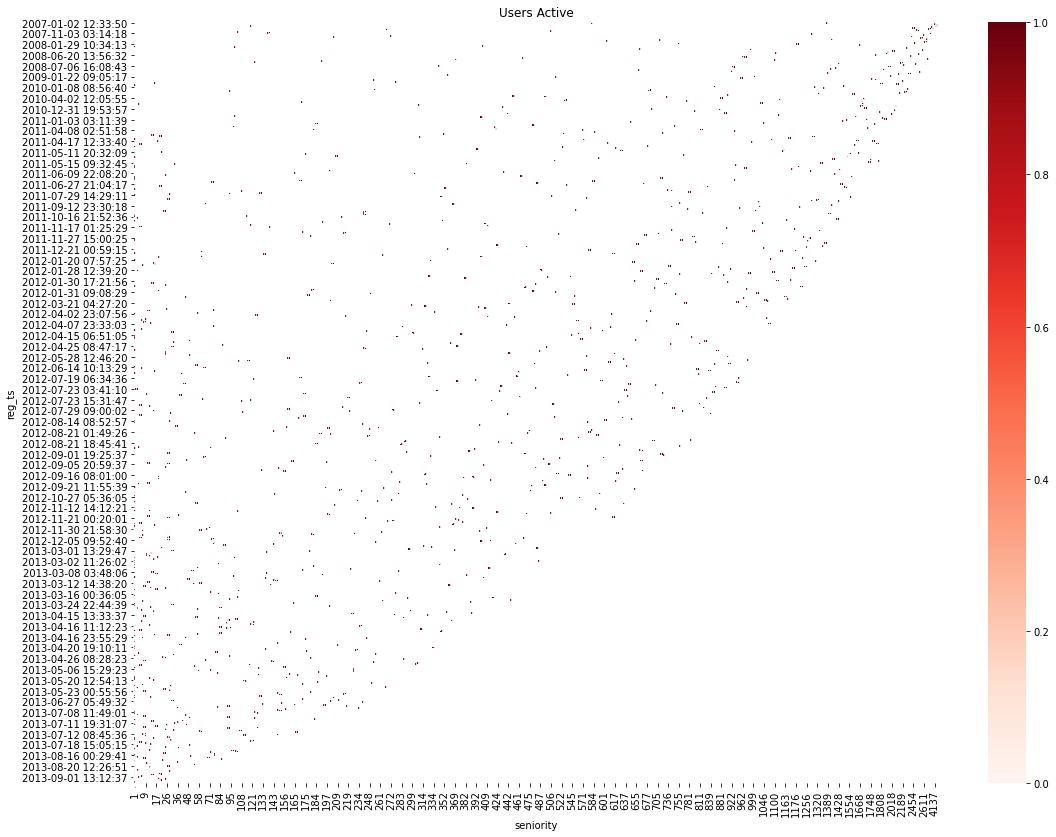

In [60]:
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()

plt.show()